In [1]:
import reward_machines
import gymnasium 
from reward_machines.envs.grids.grid_world import *
from reward_machines.reward_machines.rm_environment import RewardMachineWrapper
from reward_machines.rl_agents.qlearning_tabular.qlearning_tabular import q_learning_tabular

In [19]:
#Make RMEnv (debugging in environment_test.ipynb)
rm_files = ["./reward_machines/envs/grids/reward_machines/rm1.txt"]
map_file = "./reward_machines/envs/grids/maps/map0_w_hazard.txt"
test_env = ObstacleRMEnv(rm_files, map_file)

#Make RMEnv wrapper that generates counterfactual experience for each step
test_crm_env = RewardMachineWrapper(test_env, add_crm=True, gamma=1.0)

map size: 5x5
[['a' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' 'h' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' 'B' '.' '.']]


In [20]:
q_fcn_rm1 = q_learning_tabular(test_crm_env, total_timesteps=50000, epsilon = 0.4, lr=0.1,print_freq=1000)

Step 1000/50000 @ Episode 83 (-9)
Step 2000/50000 @ Episode 186 (-2)
Step 3000/50000 @ Episode 295 (-5)
Step 4000/50000 @ Episode 405 (-1)
Step 5000/50000 @ Episode 523 (-7)
Step 6000/50000 @ Episode 635 (-1)
Step 7000/50000 @ Episode 749 (-6)
Step 8000/50000 @ Episode 862 (-1)
Step 9000/50000 @ Episode 968 (-8)
Step 10000/50000 @ Episode 1077 (-10)
Step 11000/50000 @ Episode 1193 (-1)
Step 12000/50000 @ Episode 1302 (-6)
Step 13000/50000 @ Episode 1418 (-2)
Step 14000/50000 @ Episode 1525 (-6)
Step 15000/50000 @ Episode 1636 (-3)
Step 16000/50000 @ Episode 1746 (-5)
Step 17000/50000 @ Episode 1858 (-2)
Step 18000/50000 @ Episode 1964 (-6)
Step 19000/50000 @ Episode 2078 (-7)
Step 20000/50000 @ Episode 2184 (-2)
Step 21000/50000 @ Episode 2295 (0)
Step 22000/50000 @ Episode 2410 (-4)
Step 23000/50000 @ Episode 2529 (-1)
Step 24000/50000 @ Episode 2630 (-3)
Step 25000/50000 @ Episode 2751 (-3)
Step 26000/50000 @ Episode 2859 (-4)
Step 27000/50000 @ Episode 2962 (-6)
Step 28000/50000 @ E

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_q(q_fcn):

    action_to_arrow = {0:"R", 1:"D", 2:"L", 3:"U"}
    arrows = {"R":(1,0), "L":(-1,0),"U":(0,-1),"D":(0,1), "":None}
    scale=0.25

    #gather data and make plot for q fcn for each rm state 
    rm_state_qfcns = {}

    for env_state, rm_state in q_fcn:
    
        agent_loc = env_state[0]
        
        q = q_fcn[(env_state,rm_state)]
    
        if rm_state not in rm_state_qfcns: 
            #initialize q values same as initialized at start (q_init=2)
            data = np.full((test_crm_env.size, test_crm_env.size), 2, dtype=int) 
            #initialize arrow to be empty, no arrow shown if state not visited 
            data_arrow = np.full((test_crm_env.size, test_crm_env.size), "", dtype="object")
            rm_state_qfcns[rm_state] = (data, data_arrow)
    
        data,data_arrow = rm_state_qfcns[rm_state]
        data[agent_loc[0]][agent_loc[1]] = np.mean(list(q.values()))
        data_arrow[agent_loc[0]][agent_loc[1]] = action_to_arrow[max(q, key=q.get)]
        rm_state_qfcns[rm_state] = (data, data_arrow)

    #show q values and plot q fcn of each rm state 
    for rm_state in rm_state_qfcns:    
        data,data_arrow = rm_state_qfcns[rm_state]

        print("Average q value\n", data)
        print("Direction of best action\n", data_arrow)
        print("Plot showing direction of best action and average q value")

        fig, ax = plt.subplots()
        # Using matshow here just because it sets the ticks up nicely. imshow is faster.
        ax.matshow(data, cmap='seismic')

        for (i, j), z in np.ndenumerate(data_arrow):
            if arrows[z]: #add arrow if state was visited 
                plt.arrow(j, i, scale*arrows[z][0], scale*arrows[z][1], head_width=0.1)

        plt.show()

Average q value
 [[94 95 95 88 53]
 [95 46 96 95 74]
 [46  2 48 96 75]
 [97 48 98 97 67]
 [92 98  2 62 25]]
Direction of best action
 [['R' 'D' 'D' 'D' 'L']
 ['R' 'R' 'D' 'L' 'L']
 ['D' '' 'D' 'D' 'L']
 ['R' 'D' 'D' 'L' 'L']
 ['R' 'R' '' 'L' 'U']]
Plot showing direction of best action and average q value


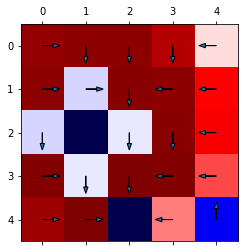

In [22]:
visualize_q(q_fcn_rm1)

In [33]:
#Make RMEnv (debugging in environment_test.ipynb)
rm_files = ["./reward_machines/envs/grids/reward_machines/rm2.txt"]
map_file = "./reward_machines/envs/grids/maps/map0_w_hazard_2nd_target.txt"
test_env = ObstacleRMEnv(rm_files, map_file)

#Make RMEnv wrapper that generates counterfactual experience for each step
test_crm_env = RewardMachineWrapper(test_env, add_crm=True, gamma=1.0)

map size: 5x5
[['a' '.' '.' '.' '.']
 ['.' '.' '.' '.' 'C']
 ['.' 'h' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' 'B' '.' '.']]


In [34]:
q_fcn_rm2 = q_learning_tabular(test_crm_env, total_timesteps=50000, epsilon = 0.4, lr=0.1,print_freq=1000)

Step 1000/50000 @ Episode 45 (-29)
Step 2000/50000 @ Episode 94 (-1)
Step 3000/50000 @ Episode 155 (-19)
Step 4000/50000 @ Episode 222 (-14)
Step 5000/50000 @ Episode 293 (-26)
Step 6000/50000 @ Episode 354 (-6)
Step 7000/50000 @ Episode 424 (-14)
Step 8000/50000 @ Episode 490 (-20)
Step 9000/50000 @ Episode 561 (-5)
Step 10000/50000 @ Episode 625 (-13)
Step 11000/50000 @ Episode 689 (-1)
Step 12000/50000 @ Episode 753 (-9)
Step 13000/50000 @ Episode 818 (-11)
Step 14000/50000 @ Episode 892 (-3)
Step 15000/50000 @ Episode 961 (-4)
Step 16000/50000 @ Episode 1028 (-15)
Step 17000/50000 @ Episode 1094 (-4)
Step 18000/50000 @ Episode 1169 (-3)
Step 19000/50000 @ Episode 1231 (-10)
Step 20000/50000 @ Episode 1300 (-6)
Step 21000/50000 @ Episode 1370 (-1)
Step 22000/50000 @ Episode 1433 (-3)
Step 23000/50000 @ Episode 1495 (-1)
Step 24000/50000 @ Episode 1561 (-2)
Step 25000/50000 @ Episode 1632 (-12)
Step 26000/50000 @ Episode 1703 (-5)
Step 27000/50000 @ Episode 1767 (-17)
Step 28000/5000

Average q value
 [[89 90 90 69  8]
 [90 42 91 43  2]
 [41  2 44 91 31]
 [70 42 93 84 35]
 [28 51  2 35 16]]
Direction of best action
 [['R' 'D' 'D' 'D' 'L']
 ['R' 'R' 'D' 'L' '']
 ['D' '' 'D' 'L' 'L']
 ['R' 'R' 'D' 'L' 'U']
 ['U' 'R' '' 'L' 'L']]
Plot showing direction of best action and average q value


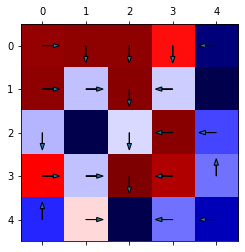

Average q value
 [[95 96 97 96 86]
 [95 47 97 98  2]
 [45  2 47 97 96]
 [84 45 95 96 82]
 [61 93 95 94 68]]
Direction of best action
 [['R' 'D' 'D' 'D' 'D']
 ['R' 'R' 'R' 'R' '']
 ['U' '' 'R' 'U' 'U']
 ['R' 'R' 'R' 'U' 'U']
 ['R' 'R' 'U' 'U' 'L']]
Plot showing direction of best action and average q value


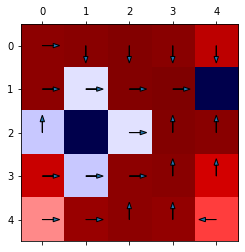

In [35]:
visualize_q(q_fcn_rm2)

In [36]:
q_fcn_rm2_no_crm = q_learning_tabular(test_crm_env, total_timesteps=50000, epsilon = 0.4, lr=0.1,print_freq=1000, use_crm=False)

Step 1000/50000 @ Episode 41 (-57)
Step 2000/50000 @ Episode 85 (-18)
Step 3000/50000 @ Episode 142 (-14)
Step 4000/50000 @ Episode 203 (-5)
Step 5000/50000 @ Episode 271 (-18)
Step 6000/50000 @ Episode 338 (-4)
Step 7000/50000 @ Episode 412 (-3)
Step 8000/50000 @ Episode 478 (-9)
Step 9000/50000 @ Episode 545 (-1)
Step 10000/50000 @ Episode 610 (0)
Step 11000/50000 @ Episode 675 (-10)
Step 12000/50000 @ Episode 747 (0)
Step 13000/50000 @ Episode 814 (-24)
Step 14000/50000 @ Episode 881 (0)
Step 15000/50000 @ Episode 950 (-22)
Step 16000/50000 @ Episode 1017 (-15)
Step 17000/50000 @ Episode 1083 (-16)
Step 18000/50000 @ Episode 1149 (-3)
Step 19000/50000 @ Episode 1214 (-1)
Step 20000/50000 @ Episode 1289 (0)
Step 21000/50000 @ Episode 1354 (-6)
Step 22000/50000 @ Episode 1426 (-12)
Step 23000/50000 @ Episode 1488 (-3)
Step 24000/50000 @ Episode 1557 (0)
Step 25000/50000 @ Episode 1626 (0)
Step 26000/50000 @ Episode 1687 (-14)
Step 27000/50000 @ Episode 1751 (-10)
Step 28000/50000 @ Ep

Average q value
 [[89 90 90 63  1]
 [89 42 91 43  2]
 [41  2 44 91 29]
 [39 42 93 92 70]
 [12 40  2 62 33]]
Direction of best action
 [['R' 'D' 'D' 'D' 'L']
 ['R' 'R' 'D' 'D' '']
 ['U' '' 'D' 'D' 'L']
 ['R' 'R' 'D' 'L' 'L']
 ['R' 'R' '' 'L' 'U']]
Plot showing direction of best action and average q value


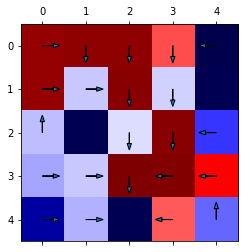

Average q value
 [[ 1  6 24 37 16]
 [ 1  8 60 96  2]
 [ 0  2 47 97 98]
 [35 44 95 96 97]
 [45 90 95 96 81]]
Direction of best action
 [['U' 'R' 'D' 'D' 'D']
 ['D' 'R' 'R' 'R' '']
 ['D' '' 'R' 'R' 'U']
 ['R' 'R' 'R' 'U' 'U']
 ['R' 'R' 'U' 'U' 'U']]
Plot showing direction of best action and average q value


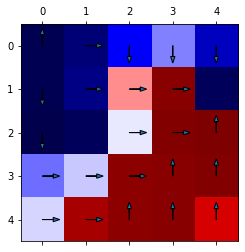

In [37]:
visualize_q(q_fcn_rm2_no_crm)

In [38]:
#Make RMEnv (debugging in environment_test.ipynb)
rm_files = ["./reward_machines/envs/grids/reward_machines/rm2.txt"]
map_file = "./reward_machines/envs/grids/maps/map1.txt"
test_env = ObstacleRMEnv(rm_files, map_file)

#Make RMEnv wrapper that generates counterfactual experience for each step
test_crm_env = RewardMachineWrapper(test_env, add_crm=True, gamma=1.0)

map size: 8x8
[['a' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' 'X' '.' '.' '.']
 ['.' '.' 'C' 'X' 'X' '.' '.' '.']
 ['.' '.' '.' 'X' '.' '.' '.' '.']
 ['.' 'H' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' 'B' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']]


In [39]:
q_fcn_rm2_map2 = q_learning_tabular(test_crm_env, total_timesteps=50000, epsilon = 0.2, lr=0.1,print_freq=1000)

Step 1000/50000 @ Episode 15 (-37)
Step 2000/50000 @ Episode 26 (-83)
Step 3000/50000 @ Episode 40 (-93)
Step 4000/50000 @ Episode 60 (-48)
Step 5000/50000 @ Episode 87 (-23)
Step 6000/50000 @ Episode 123 (-5)
Step 7000/50000 @ Episode 175 (-22)
Step 8000/50000 @ Episode 233 (-16)
Step 9000/50000 @ Episode 285 (-5)
Step 10000/50000 @ Episode 340 (0)
Step 11000/50000 @ Episode 395 (-17)
Step 12000/50000 @ Episode 446 (-5)
Step 13000/50000 @ Episode 503 (-14)
Step 14000/50000 @ Episode 561 (-21)
Step 15000/50000 @ Episode 615 (-14)
Step 16000/50000 @ Episode 672 (-14)
Step 17000/50000 @ Episode 728 (-15)
Step 18000/50000 @ Episode 783 (-9)
Step 19000/50000 @ Episode 836 (-18)
Step 20000/50000 @ Episode 891 (-6)
Step 21000/50000 @ Episode 949 (-5)
Step 22000/50000 @ Episode 1006 (-18)
Step 23000/50000 @ Episode 1063 (-11)
Step 24000/50000 @ Episode 1118 (-7)
Step 25000/50000 @ Episode 1176 (-14)
Step 26000/50000 @ Episode 1234 (-21)
Step 27000/50000 @ Episode 1292 (-3)
Step 28000/50000 @ 

Average q value
 [[84 53 10 -2 -1 -1  0  0]
 [85 72  2 -1  2  0  0  0]
 [86 36  2  2  2  0  0  0]
 [86 40 41  2 16  6  0  0]
 [21  2 42 73 59 25  2  0]
 [22 20 90 91 92 34 11  1]
 [ 4 17 44 52  2 12  2  1]
 [ 0  2  4 17  3  1  1  1]]
Direction of best action
 [['D' 'D' 'D' 'U' 'L' 'R' 'R' 'L']
 ['D' 'D' 'L' 'L' '' 'D' 'D' 'R']
 ['D' 'D' '' '' '' 'D' 'L' 'L']
 ['R' 'R' 'D' '' 'D' 'D' 'L' 'U']
 ['U' '' 'D' 'R' 'D' 'L' 'L' 'R']
 ['R' 'R' 'R' 'R' 'D' 'L' 'L' 'L']
 ['U' 'R' 'U' 'R' '' 'L' 'L' 'U']
 ['U' 'U' 'R' 'U' 'U' 'U' 'U' 'R']]
Plot showing direction of best action and average q value


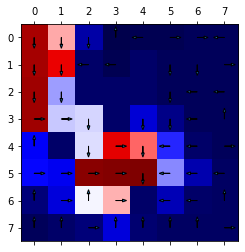

Average q value
 [[94 80 52 33 16  5  1  0]
 [95 89 65 43  2  1  0  0]
 [96 94  2  2  2  1  0  0]
 [96 48 98  2 22 11  1  0]
 [30  2 48 96 75 28  4  0]
 [29 26 96 95 94 43 13  1]
 [ 7 24 73 94 93 48 15  0]
 [ 0  7 32 45 48 22  2  0]]
Direction of best action
 [['D' 'D' 'D' 'L' 'L' 'L' 'L' 'L']
 ['D' 'D' 'L' 'L' '' 'U' 'U' 'U']
 ['D' 'D' '' '' '' 'D' 'U' 'U']
 ['R' 'R' 'U' '' 'D' 'D' 'L' 'L']
 ['U' '' 'U' 'L' 'L' 'L' 'L' 'L']
 ['R' 'R' 'U' 'U' 'L' 'L' 'L' 'L']
 ['U' 'R' 'U' 'U' 'L' 'L' 'L' 'L']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U' 'L']]
Plot showing direction of best action and average q value


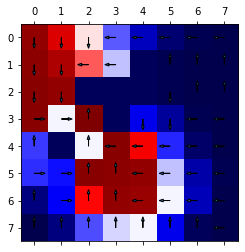

In [40]:
visualize_q(q_fcn_rm2_map2)

In [31]:
q_fcn_rm2_map2_no_crm = q_learning_tabular(test_crm_env, total_timesteps=50000, epsilon = 0.2, lr=0.1,print_freq=1000, use_crm=False)

Step 1000/50000 @ Episode 15 (-14)
Step 2000/50000 @ Episode 24 (-65)
Step 3000/50000 @ Episode 38 (-31)
Step 4000/50000 @ Episode 48 (-28)
Step 5000/50000 @ Episode 63 (-15)
Step 6000/50000 @ Episode 85 (-20)
Step 7000/50000 @ Episode 114 (-18)
Step 8000/50000 @ Episode 144 (-19)
Step 9000/50000 @ Episode 193 (-18)
Step 10000/50000 @ Episode 251 (0)
Step 11000/50000 @ Episode 308 (-17)
Step 12000/50000 @ Episode 365 (-8)
Step 13000/50000 @ Episode 424 (-4)
Step 14000/50000 @ Episode 483 (-10)
Step 15000/50000 @ Episode 541 (-24)
Step 16000/50000 @ Episode 596 (-18)
Step 17000/50000 @ Episode 651 (-3)
Step 18000/50000 @ Episode 710 (-6)
Step 19000/50000 @ Episode 764 (-12)
Step 20000/50000 @ Episode 824 (-1)
Step 21000/50000 @ Episode 880 (-12)
Step 22000/50000 @ Episode 939 (-7)
Step 23000/50000 @ Episode 995 (-4)
Step 24000/50000 @ Episode 1054 (0)
Step 25000/50000 @ Episode 1112 (-4)
Step 26000/50000 @ Episode 1176 (-8)
Step 27000/50000 @ Episode 1236 (-10)
Step 28000/50000 @ Episod

Average q value
 [[83 38 10 -2 -2 -1 -1 -1]
 [85 67  3 -3  2 -1 -1  0]
 [86 39  2  2  2  0  0  0]
 [56 40 41  2 17  4  0  0]
 [-9  2 42 91 63 24  4  0]
 [ 6  8 62 91 92 47 16  0]
 [ 0  3 25 43  2 16  2  0]
 [ 0  0  1 17  1  0  0  0]]
Direction of best action
 [['D' 'L' 'D' 'U' 'R' 'D' 'D' 'D']
 ['D' 'D' 'L' 'R' '' 'D' 'D' 'U']
 ['R' 'D' '' '' '' 'D' 'L' 'R']
 ['R' 'R' 'D' '' 'D' 'D' 'D' 'R']
 ['U' '' 'R' 'D' 'D' 'D' 'L' 'L']
 ['R' 'R' 'R' 'R' 'D' 'L' 'L' 'L']
 ['U' 'R' 'R' 'R' '' 'L' 'L' 'L']
 ['U' 'R' 'R' 'U' 'U' 'D' 'R' 'R']]
Plot showing direction of best action and average q value


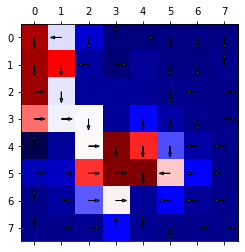

Average q value
 [[ 2  1  1  1  1  1  1  1]
 [ 1  2 10  3  2  1  1  1]
 [ 1  5  2  2  2  1  1  1]
 [12 16 98  2 24  4  1  1]
 [ 0  2 48 96 62 24  1  1]
 [ 1 16 81 95 68 21  9  1]
 [ 1  9 40 94 93 34  3  0]
 [ 1  1 18 48 47 15  1  0]]
Direction of best action
 [['' 'D' 'D' 'R' 'R' 'R' 'L' 'L']
 ['U' 'R' 'D' 'L' '' 'D' 'R' 'U']
 ['R' 'D' '' '' '' 'D' 'L' 'U']
 ['R' 'R' 'U' '' 'D' 'L' 'L' 'D']
 ['L' '' 'U' 'L' 'L' 'L' 'R' 'D']
 ['U' 'R' 'U' 'U' 'U' 'U' 'L' 'L']
 ['D' 'U' 'U' 'U' 'L' 'L' 'U' 'R']
 ['L' 'R' 'R' 'U' 'U' 'L' 'L' 'D']]
Plot showing direction of best action and average q value


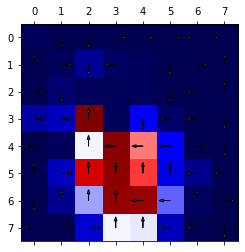

In [41]:
visualize_q(q_fcn_rm2_map2_no_crm)

In [42]:
#Make RMEnv (debugging in environment_test.ipynb)
rm_files = ["./reward_machines/envs/grids/reward_machines/rm3.txt"]
map_file = "./reward_machines/envs/grids/maps/map2.txt"
test_env = ObstacleRMEnv(rm_files, map_file)

#Make RMEnv wrapper that generates counterfactual experience for each step
test_crm_env = RewardMachineWrapper(test_env, add_crm=True, gamma=1.0)

map size: 10x10
[['a' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' 'X' '.' '.' 'H' '.' '.']
 ['.' '.' 'C' 'X' 'X' '.' '.' '.' '.' '.']
 ['.' '.' '.' 'X' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' 'H' '.' '.' '.' '.' '.' 'D' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' 'B' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']]


In [43]:
q_fcn_rm3 = q_learning_tabular(test_crm_env, total_timesteps=50000, epsilon = 0.2, lr=0.1,print_freq=1000)

Step 1000/50000 @ Episode 24 (-57)
Step 2000/50000 @ Episode 30 (-146)
Step 3000/50000 @ Episode 37 (-190)
Step 4000/50000 @ Episode 41 (-290)
Step 5000/50000 @ Episode 54 (-92)
Step 6000/50000 @ Episode 60 (-4)
Step 7000/50000 @ Episode 69 (-9)
Step 8000/50000 @ Episode 77 (-3)
Step 9000/50000 @ Episode 84 (-359)
Step 10000/50000 @ Episode 97 (-120)
Step 11000/50000 @ Episode 104 (-22)
Step 12000/50000 @ Episode 111 (-18)
Step 13000/50000 @ Episode 124 (-116)
Step 14000/50000 @ Episode 135 (-16)
Step 15000/50000 @ Episode 143 (-32)
Step 16000/50000 @ Episode 150 (-75)
Step 17000/50000 @ Episode 163 (-102)
Step 18000/50000 @ Episode 169 (-117)
Step 19000/50000 @ Episode 179 (-156)
Step 20000/50000 @ Episode 186 (-118)
Step 21000/50000 @ Episode 198 (-39)
Step 22000/50000 @ Episode 207 (-44)
Step 23000/50000 @ Episode 218 (-1)
Step 24000/50000 @ Episode 227 (-118)
Step 25000/50000 @ Episode 242 (-22)
Step 26000/50000 @ Episode 257 (-15)
Step 27000/50000 @ Episode 277 (-1)
Step 28000/500

Average q value
 [[ 66  18  -7  -6  -6  -5  -5 -22  -4  -4]
 [ 66  18 -26  -7   2  -5 -19   2 -20  -4]
 [ 72   2   2   2   2  -4  -4 -11  -4  -4]
 [ 72  31 -12   2  -2  -3  -4  -4  -4  -4]
 [ 69  72  -2   1   7   0  -3  -3 -18  -3]
 [ 26  28   2  -8  13  -1  -3 -18   2 -17]
 [ 37  76  10  23  18   0  -3  -3 -13  -3]
 [ 25  70  77  74   2   7  -1  -3  -3  -3]
 [  2  19  23  19   3  -1  -2  -2  -3  -3]
 [ -2  -3  -3   0  -2  -2  -2  -2  -3  -3]]
Direction of best action
 [['D' 'L' 'R' 'D' 'D' 'L' 'R' 'R' 'L' 'U']
 ['D' 'D' 'U' 'D' '' 'D' 'D' '' 'D' 'R']
 ['D' 'D' '' '' '' 'D' 'L' 'D' 'U' 'R']
 ['D' 'D' 'D' '' 'D' 'D' 'U' 'U' 'D' 'R']
 ['R' 'D' 'L' 'R' 'D' 'L' 'L' 'D' 'L' 'R']
 ['D' 'D' '' 'R' 'D' 'L' 'D' 'U' '' 'U']
 ['R' 'D' 'D' 'D' 'D' 'D' 'L' 'L' 'D' 'D']
 ['R' 'R' 'R' 'R' '' 'L' 'L' 'L' 'U' 'L']
 ['U' 'U' 'U' 'U' 'U' 'U' 'R' 'D' 'L' 'U']
 ['U' 'D' 'D' 'U' 'U' 'U' 'L' 'U' 'L' 'D']]
Plot showing direction of best action and average q value


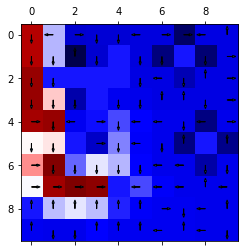

Average q value
 [[ 80  56  26  13   3  -2  -4 -22  -5  -5]
 [ 83  51  32  20   2  -3 -19   2 -23  -5]
 [ 84  65   2   2   2  -2  -4 -17  -5  -5]
 [ 85  75  88   2   8   2  -2  -4  -4  -5]
 [ 79  86  41  86  42  11   0  -3 -18  -4]
 [ 37  33   2  37  43   7  -3 -22   2 -21]
 [ 40  79  28  83  42  10  -3  -4 -16  -4]
 [ 27  73  81  84  81  23   2  -4  -4  -4]
 [  1  20  24  35  22   4  -4  -4  -4  -4]
 [ -3  -3  -3   2   0  -4  -4  -4  -4  -4]]
Direction of best action
 [['D' 'L' 'D' 'L' 'L' 'L' 'L' 'L' 'L' 'L']
 ['D' 'D' 'L' 'L' '' 'D' 'L' '' 'U' 'U']
 ['R' 'D' '' '' '' 'D' 'D' 'L' 'L' 'U']
 ['R' 'R' 'U' '' 'D' 'D' 'D' 'L' 'L' 'R']
 ['R' 'R' 'U' 'L' 'L' 'L' 'L' 'L' 'L' 'L']
 ['D' 'U' '' 'U' 'D' 'L' 'L' 'L' '' 'U']
 ['R' 'D' 'R' 'U' 'D' 'D' 'L' 'U' 'R' 'U']
 ['R' 'R' 'R' 'U' 'L' 'L' 'L' 'L' 'U' 'R']
 ['U' 'U' 'U' 'U' 'U' 'U' 'R' 'R' 'R' 'U']
 ['U' 'U' 'R' 'U' 'U' 'U' 'R' 'U' 'R' 'U']]
Plot showing direction of best action and average q value


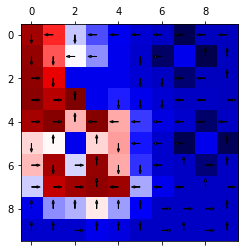

Average q value
 [[85 71 53 47 56 63 60 18 47 42]
 [87 71 53 43  2 71 36  2 23 52]
 [88 77 86  2  2 78 80 47 72 63]
 [89 87 91  2 79 81 86 88 82 74]
 [88 91 44 94 89 91 93 94 81 79]
 [65 41  2 45 95 96 97 98  2 77]
 [60 89 40 93 92 90 91 93 80 78]
 [46 84 91 92 92 82 82 83 78 70]
 [16 37 46 59 58 59 67 71 65 56]
 [ 6 11 18 32 39 47 57 61 55 46]]
Direction of best action
 [['D' 'L' 'R' 'R' 'R' 'D' 'D' 'L' 'D' 'D']
 ['D' 'D' 'L' 'U' '' 'D' 'D' '' 'D' 'D']
 ['D' 'D' 'D' '' '' 'D' 'D' 'D' 'D' 'D']
 ['D' 'R' 'D' '' 'D' 'D' 'D' 'D' 'L' 'D']
 ['R' 'R' 'R' 'D' 'D' 'D' 'D' 'D' 'L' 'L']
 ['D' 'D' '' 'R' 'R' 'R' 'R' 'R' '' 'D']
 ['R' 'R' 'R' 'U' 'U' 'U' 'U' 'U' 'L' 'L']
 ['R' 'R' 'R' 'U' 'U' 'L' 'U' 'U' 'L' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'R' 'U' 'U' 'U' 'U' 'U' 'U' 'L']]
Plot showing direction of best action and average q value


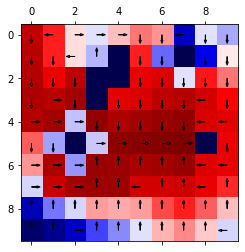

In [44]:
visualize_q(q_fcn_rm3)

In [45]:
q_fcn_rm3_no_crm = q_learning_tabular(test_crm_env, total_timesteps=50000, epsilon = 0.2, lr=0.1,print_freq=1000, use_crm=False)

Step 1000/50000 @ Episode 18 (-20)
Step 2000/50000 @ Episode 31 (-55)
Step 3000/50000 @ Episode 44 (-197)
Step 4000/50000 @ Episode 52 (-202)
Step 5000/50000 @ Episode 63 (-94)
Step 6000/50000 @ Episode 69 (-21)
Step 7000/50000 @ Episode 77 (-147)
Step 8000/50000 @ Episode 85 (-37)
Step 9000/50000 @ Episode 95 (-18)
Step 10000/50000 @ Episode 101 (-67)
Step 11000/50000 @ Episode 106 (-183)
Step 12000/50000 @ Episode 112 (-237)
Step 13000/50000 @ Episode 123 (-1)
Step 14000/50000 @ Episode 127 (-118)
Step 15000/50000 @ Episode 134 (-175)
Step 16000/50000 @ Episode 141 (-33)
Step 17000/50000 @ Episode 145 (-229)
Step 18000/50000 @ Episode 151 (-336)
Step 19000/50000 @ Episode 161 (-32)
Step 20000/50000 @ Episode 170 (-19)
Step 21000/50000 @ Episode 176 (-174)
Step 22000/50000 @ Episode 182 (-145)
Step 23000/50000 @ Episode 186 (-324)
Step 24000/50000 @ Episode 192 (-156)
Step 25000/50000 @ Episode 201 (-6)
Step 26000/50000 @ Episode 210 (-192)
Step 27000/50000 @ Episode 218 (-145)
Step 2

Average q value
 [[ -8  -8  -7  -7  -6  -5  -5 -20  -4  -4]
 [ -7  -7 -27  -7   2  -5 -16   2 -25  -4]
 [ -7 -23   2   2   2  -4  -4 -19  -4  -4]
 [ -6  -6 -24   2  -4  -4  -4  -4  -4  -4]
 [ -6  -5 -24  -5  -4  -4  -4  -4 -21  -4]
 [ -5 -22   2 -22  -4  -4  -4 -22   2 -16]
 [ -5  -5 -22  -4  -4  -4  -4  -4 -18  -4]
 [ -5  -4  -4  -4   2  -4  -4  -4  -4  -4]
 [ -4  -4  -4  -4  -4  -4  -4  -4  -4  -4]
 [ -4  -4  -4  -4  -4  -4  -4  -4  -4  -4]]
Direction of best action
 [['R' 'R' 'R' 'L' 'R' 'U' 'U' 'R' 'L' 'U']
 ['L' 'L' 'L' 'D' '' 'L' 'L' '' 'D' 'R']
 ['R' 'L' '' '' '' 'U' 'R' 'D' 'R' 'D']
 ['D' 'R' 'D' '' 'D' 'U' 'U' 'L' 'L' 'R']
 ['R' 'R' 'L' 'U' 'L' 'D' 'U' 'U' 'R' 'U']
 ['R' 'L' '' 'U' 'D' 'R' 'R' 'L' '' 'R']
 ['R' 'U' 'D' 'L' 'R' 'D' 'R' 'D' 'L' 'U']
 ['U' 'D' 'U' 'U' '' 'R' 'R' 'U' 'R' 'L']
 ['U' 'U' 'U' 'L' 'U' 'D' 'R' 'R' 'R' 'D']
 ['L' 'L' 'D' 'D' 'D' 'R' 'R' 'D' 'D' 'L']]
Plot showing direction of best action and average q value


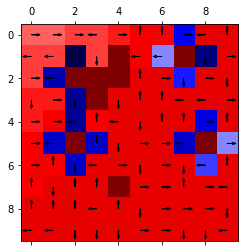

Average q value
 [[ -1  -1  -1  -2  -2  -2  -2 -17  -2  -2]
 [ -1  -1  -1  -1   2  -2 -16   2 -14  -2]
 [ -1  -1   2   2   2  -2  -2 -12  -3  -3]
 [ -2  -2  -1   2  -3  -3  -3  -3  -3  -3]
 [ -2  -2 -14  -3  -3  -3  -3  -3  -8  -3]
 [ -2 -17   2 -17  -3  -3  -3 -21   2 -21]
 [ -3  -3 -21  -3  -3  -3  -3  -3 -18  -3]
 [ -3  -3  -3  -3  -4  -3  -3  -3  -3  -3]
 [ -3  -3  -3  -3  -3  -3  -3  -3  -3  -3]
 [ -3  -3  -3  -3  -3  -3  -3  -3  -3  -3]]
Direction of best action
 [['L' 'U' 'R' 'D' 'U' 'U' 'R' 'U' 'D' 'L']
 ['L' 'L' 'D' 'U' '' 'R' 'D' '' 'D' 'U']
 ['U' 'R' '' '' '' 'U' 'L' 'D' 'U' 'R']
 ['L' 'U' 'U' '' 'L' 'U' 'U' 'L' 'U' 'U']
 ['U' 'D' 'U' 'U' 'R' 'R' 'L' 'D' 'L' 'U']
 ['U' 'L' '' 'R' 'U' 'L' 'R' 'U' '' 'R']
 ['D' 'U' 'R' 'R' 'U' 'R' 'R' 'U' 'L' 'R']
 ['L' 'U' 'U' 'U' 'L' 'U' 'L' 'L' 'U' 'D']
 ['R' 'U' 'R' 'R' 'R' 'L' 'R' 'R' 'U' 'D']
 ['R' 'D' 'R' 'D' 'R' 'R' 'L' 'R' 'U' 'R']]
Plot showing direction of best action and average q value


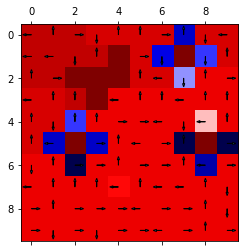

Average q value
 [[-1 -1  0  0  0  0  0 -5  1  1]
 [-1 -1 -1  0  2  0 -3  2  0  1]
 [ 0 -1  0  2  2  1  3 -2  2  1]
 [ 0  0  0  2  1  5 13  9 12  1]
 [ 0  0 -4  9 14 20 30 37 28  4]
 [ 0 -8  2 -7  1  4 14 27  2  1]
 [ 0  0 -5  0  1  1  1  8 13  1]
 [ 0  0  0  0  1  1  1  2  5  1]
 [ 0  0  0  0  1  1  1  1  1  1]
 [ 0  0  0  0  1  1  1  1  1  1]]
Direction of best action
 [['D' 'U' 'D' 'U' 'R' 'R' 'D' 'U' 'R' 'D']
 ['R' 'U' 'D' 'L' '' 'R' 'D' '' 'R' 'U']
 ['R' 'L' 'D' '' '' 'D' 'D' 'D' 'D' 'D']
 ['L' 'L' 'D' '' 'D' 'R' 'D' 'D' 'D' 'L']
 ['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'D' 'L']
 ['D' 'D' '' 'D' 'R' 'R' 'R' 'R' '' 'D']
 ['D' 'D' 'L' 'L' 'R' 'U' 'D' 'U' 'U' 'R']
 ['U' 'L' 'D' 'L' 'L' 'R' 'R' 'R' 'U' 'R']
 ['D' 'D' 'D' 'R' 'R' 'U' 'L' 'L' 'U' 'R']
 ['R' 'R' 'D' 'U' 'L' 'L' 'U' 'R' 'U' 'D']]
Plot showing direction of best action and average q value


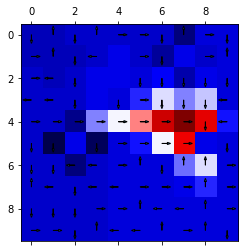

In [47]:
visualize_q(q_fcn_rm3_no_crm)